# Does money make people happy?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.
    """
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
"""
The code in the book expects the data files to be located in the current directory. 
I just tweaked it here to fetch the files in datasets/lifesat. lifesat means life satisfaction.
"""
import os
datapath = os.path.join("datasets", "lifesat", "")

In [4]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Download the data
# The Organization for Economic Cooperation and Development's (OECD) Better Life Index (BLI) data
# The International Monetary Fund's (IMF) GDP per capita data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [6]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [7]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]


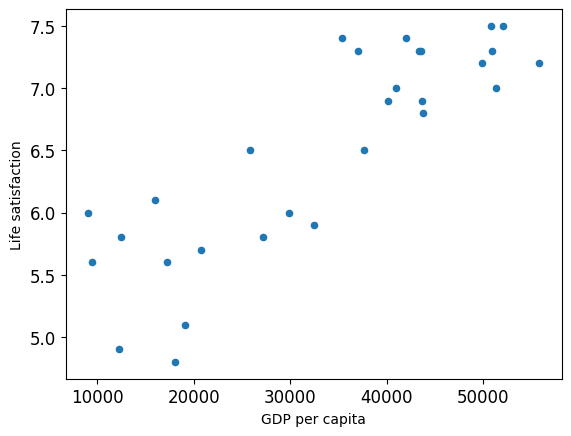

In [8]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [9]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [10]:
# Train the model
model.fit(X, y)

LinearRegression()

In [11]:
# Make a life satisfaction prediction for Philippines
X_new = [[2858]]  # Philippines' GDP per capita found in gdp_per_capita.csv
print(model.predict(X_new)) # outputs [[4.99342474]]

[[4.99342474]]


In [33]:
# Make a life satisfaction prediction for United States
X_new = [[55805]]  # Philippines' GDP per capita found in gdp_per_capita.csv
print(model.predict(X_new)) # outputs [[7.59394026]]

[[7.59394026]]


# More figures below

In [12]:
# Create a function to save the figures.
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
# Make this notebook's output stable across runs:
np.random.seed(42)

In [14]:
# More figures this time

# Load and prepare Life satisfaction data
"""
If you want, you can get fresh data from the OECD's website. 
Download the CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI and save it to datasets/lifesat/.
"""
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [15]:
# Check the first 5 rows of the data
oecd_bli["Life satisfaction"].head()


Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [16]:
# Check United States' Indicator
oecd_bli.loc["United States"]

Indicator
Air pollution                                    18.00
Assault rate                                      1.50
Consultation on rule-making                       8.30
Dwellings without basic facilities                0.10
Educational attainment                           89.00
Employees working very long hours                11.30
Employment rate                                  67.00
Homicide rate                                     5.20
Household net adjusted disposable income      41355.00
Household net financial wealth               145769.00
Housing expenditure                              18.00
Job security                                      5.90
Life expectancy                                  78.70
Life satisfaction                                 7.20
Long-term unemployment rate                       1.91
Personal earnings                             56340.00
Quality of support network                       90.00
Rooms per person                                  2.40


In [17]:
# Load and prepare GDP per capita data
"""
Just like above, you can update the GDP per capita data if you want. 
Just download data from http://goo.gl/j1MSKe (=> imf.org) and save it to datasets/lifesat/.
"""
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [18]:
# Merge the 'oecd_bli' and 'gdp_per_capita' dataframes on their indices
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)

# Sort the merged dataframe in-place by the 'GDP per capita' column
full_country_stats.sort_values(by="GDP per capita", inplace=True)

# Display the resulting dataframe
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [32]:
# display these [0, 1, 6, 8, 33, 34, 35] indices
full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[[0, 1, 6, 8, 33, 34, 35]]

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [19]:
# United States' GDP per capita and Life satisfaction
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]


GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [20]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [21]:
# Define the indices of rows to be removed from the DataFrame
remove_indices = [0, 1, 6, 8, 33, 34, 35]

# Define the indices of rows to be kept in the DataFrame by subtracting the remove_indices from all indices
keep_indices = list(set(range(36)) - set(remove_indices))

# Create a new DataFrame 'sample_data' with rows from 'full_country_stats' at keep_indices 
# and only 'GDP per capita' and 'Life satisfaction' columns
sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Create a new DataFrame 'missing_data' with rows from 'full_country_stats' at remove_indices and 
# only 'GDP per capita' and 'Life satisfaction' columns
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Saving figure money_happy_scatterplot


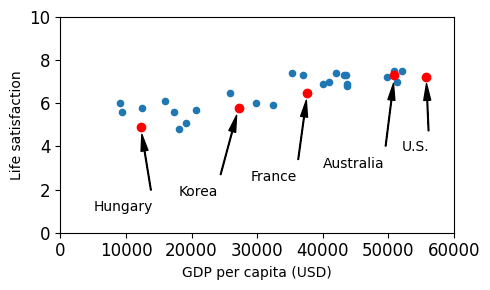

In [22]:
# Plot the data
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
save_fig('money_happy_scatterplot')
plt.show()

In [23]:
# Save the sample data to a CSV file
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [24]:
# Plot the sample data
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Saving figure tweaking_model_params_plot


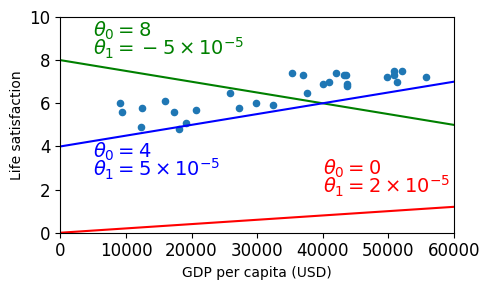

In [25]:
# Plot the sample data 
import numpy as np

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')
plt.show()

In [26]:
# Select a linear model
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158484e-05)

Saving figure best_fit_model_plot


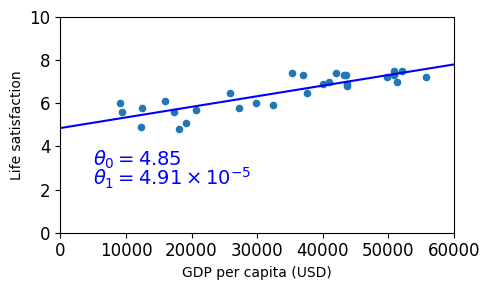

In [27]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()

In [28]:
philippines_gdp_per_capita = gdp_per_capita.loc["Philippines"]["GDP per capita"]
print(f"Philippines' GDP per capita: {philippines_gdp_per_capita}")

philippines_predicted_life_satisfaction = lin1.predict([[philippines_gdp_per_capita]])[0][0]
print(f"Predicted life satisfaction: {philippines_predicted_life_satisfaction}")

Philippines' GDP per capita: 2858.144
Predicted life satisfaction: 4.993431817248794


Saving figure philippines_prediction_plot


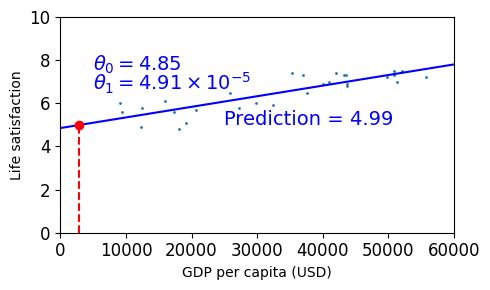

In [29]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([philippines_gdp_per_capita, philippines_gdp_per_capita], [0, philippines_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 4.99", fontsize=14, color="b")
plt.plot(philippines_gdp_per_capita, philippines_predicted_life_satisfaction, "ro")
save_fig('philippines_prediction_plot')
plt.show()

# Summary

This notebook explores the relationship between money and happiness. It starts by importing necessary modules and defining a function to prepare the data. The data is then downloaded and loaded into the notebook. The data consists of life satisfaction and GDP per capita information for various countries.

The notebook proceeds to visualize the data using scatter plots and explores the relationship between GDP per capita and life satisfaction. A linear regression model is trained to predict life satisfaction based on GDP per capita. We've seen developed countries with higher GDP per capita have higher life satisfaction, and developing countries with lower GDP per capita have lower life satisfaction. The assertion that 'does money make people happy?' holds true, as the model predicts an increase in life satisfaction with higher GDP per capita. It's important to note that the relationship between money and happiness is complex. Research such as studies by [Kahneman and Deaton (2010)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2944762/) and [Easterlin (1974)](https://mpra.ub.uni-muenchen.de/111773/) suggests that up to a certain income level, increased wealth can contribute to higher life satisfaction. However, beyond a certain point, the correlation diminishes, and other factors like social relationships, health, and personal fulfillment play a more significant role in overall happiness.

In conclusion, the notebook summarizes the key findings, and the figures generated during the analysis are saved. In essence, it offers an exploration of the real-world data, examining how money influences happiness.
